In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from ipywidgets import interact
from utils import plot_slice, plot_label

from dataLoad import data_load_numpy, data_load_tensors, get_dataloaders


/Users/rasmus/Desktop/Bachelor_projekt/Bachelor_projekt_git/Segmentation-of-focused-ion-beam-tomography-image-data-/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [7]:
X, y = data_load_numpy(processing=True)

# X = X/255
X.shape


Loading data...

Processing data...

Data processed.



(645, 2, 544, 897)

In [4]:
mu_X1 = X[:,0,:,:].mean()
mu_X2 = X[:,1,:,:].mean()

sd_X1 = X[:,0,:,:].std()
sd_X2 = X[:,1,:,:].std()

print("Average for detector 1: ", mu_X1)
print("Average for detector 2: ", mu_X2)

print("Standard deviation for detector 1: ", sd_X1)
print("Standard deviation for detector 2: ", sd_X2)

Average for detector 1:  0.4626172570265656
Average for detector 2:  0.521423973598952
Standard deviation for detector 1:  0.15913137578173225
Standard deviation for detector 2:  0.32835114830370293


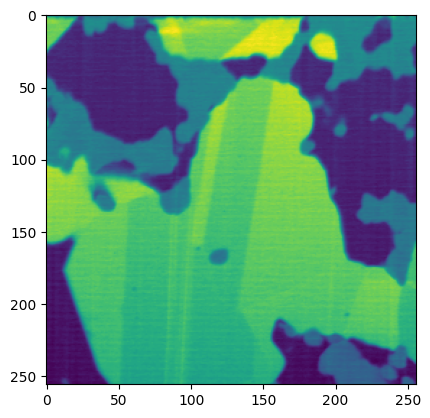

In [11]:
plot_slice(X,0,0)

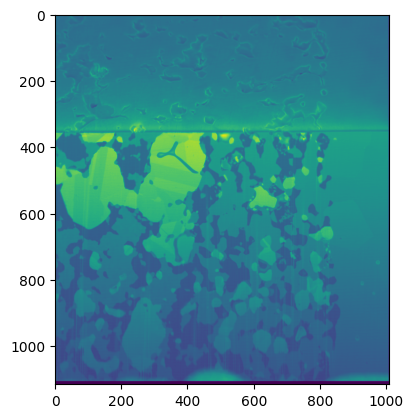

In [18]:
plot_slice(X_original,0,0)

(544, 897)

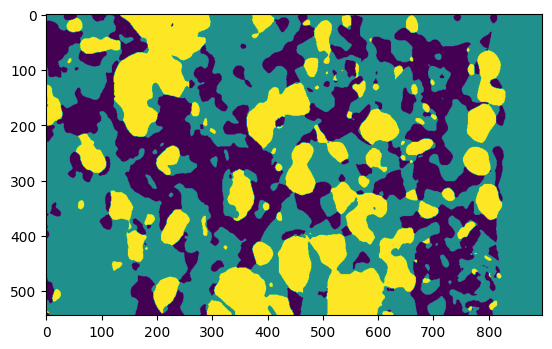

In [22]:
plot_label(y_original, 100)

In [1]:
import torch
if torch.backends.mps.is_available():
    mps_device = torch.device("mps")
    x = torch.ones(1, device=mps_device)
    print (x)
else:
    print ("MPS device not found.")

tensor([1.], device='mps:0')


In [ ]:
interact(plot_slice, i=(0, X[0].shape[0]-1))